In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [7]:
class_names = ['Mondriaan','Picasso','Rembrandt','Rubens', 'VanGogh']
train_dataset = image_dataset_from_directory("/content/drive/MyDrive/deeplearning/schilderijen/selected_images/train",
                                             image_size=(256,256),
                                             labels = 'inferred',
                                             batch_size = 32,
                                             class_names= class_names,
                                             label_mode = 'categorical')
validation_dataset = image_dataset_from_directory("/content/drive/MyDrive/deeplearning/schilderijen/selected_images/val",
                                                  image_size=(256,256),
                                                  labels = 'inferred',
                                                  batch_size = 32,
                                                  class_names = class_names,
                                                  label_mode = 'categorical')
test_dataset = image_dataset_from_directory("/content/drive/MyDrive/deeplearning/schilderijen/selected_images/test",
                                            image_size=(256,256),
                                            labels = 'inferred',
                                            class_names = class_names,
                                            batch_size = 32,
                                            label_mode = 'categorical')

Found 1110 files belonging to 5 classes.
Found 370 files belonging to 5 classes.
Found 370 files belonging to 5 classes.


In [8]:
conv_base = keras.applications.VGG16(
 weights="imagenet",
 include_top=False)
conv_base.trainable = False

In [9]:
data_augmentation = keras.Sequential(
 [
layers.experimental.preprocessing.RandomFlip("horizontal"),
layers.experimental.preprocessing.RandomRotation(0.1),
layers.experimental.preprocessing.RandomZoom(0.2),
 ]
)
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
optimizer="RMSprop",
metrics=["categorical_accuracy"])

In [10]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
filepath="VGG16_5schilders.h5",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
 train_dataset,
 epochs=10,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/10
35/35 [==============================] - 373s 9s/step - loss: 106.9827 - categorical_accuracy: 0.6369 - val_loss: 75.2876 - val_categorical_accuracy: 0.7162
Epoch 2/10
35/35 [==============================] - 18s 485ms/step - loss: 32.6159 - categorical_accuracy: 0.8018 - val_loss: 53.6794 - val_categorical_accuracy: 0.7703
Epoch 3/10
35/35 [==============================] - 18s 489ms/step - loss: 26.9774 - categorical_accuracy: 0.8523 - val_loss: 35.4038 - val_categorical_accuracy: 0.8649
Epoch 4/10
35/35 [==============================] - 18s 482ms/step - loss: 21.8287 - categorical_accuracy: 0.8739 - val_loss: 46.2788 - val_categorical_accuracy: 0.8378
Epoch 5/10
35/35 [==============================] - 18s 494ms/step - loss: 17.3820 - categorical_accuracy: 0.8838 - val_loss: 31.0200 - val_categorical_accuracy: 0.8865
Epoch 6/10
35/35 [==============================] - 18s 480ms/step - loss: 14.6400 - categorical_accuracy: 0.9090 - val_loss: 44.7340 - val_categorical_accu

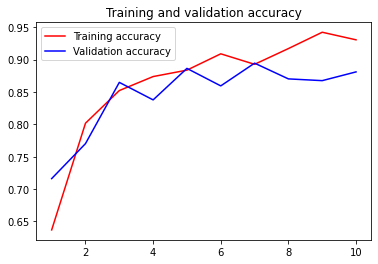

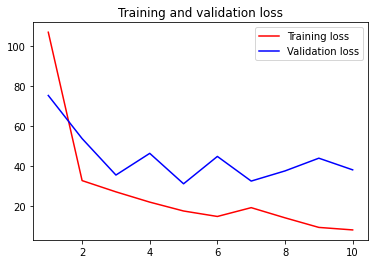

In [11]:
import matplotlib.pyplot as plt
accuracy = history.history["categorical_accuracy"]
val_accuracy = history.history["val_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [12]:
test_model = keras.models.load_model(
 "VGG16_5schilders.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

12/12 [==============================] - 129s 3s/step - loss: 28.5704 - categorical_accuracy: 0.8703
Test accuracy: 0.870
